<a href="https://colab.research.google.com/github/suryagokul/Data-Science-Portfolio/blob/master/Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Selection

      Techniques:
                  1)Univariate analysis
                  2)Feature Importance
                  3)Correlation
                  4)Information Gain or mutual_info_classif
                  5)Dropping Constant features

In [ ]:
import pandas as pd

import numpy as np


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/sanithps98/Automobile-Dataset-Analysis/master/module_5_auto.csv")

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [ ]:
features_objects = df.select_dtypes(include='object')

df = pd.concat([df,pd.get_dummies(features_objects)],axis=1)

In [ ]:
df.drop(features_objects,axis=1,inplace=True)

In [ ]:
df = df.fillna(df.values.mean())

In [ ]:
print(df.columns[df.isnull().any()])

df.stroke = df['stroke'].fillna(df['stroke'].mean())

df.columns[df.isnull().any()]

Index(['stroke'], dtype='object')


Index([], dtype='object')

In [ ]:
df[df<0] = 0

In [ ]:

X=df.drop('price',axis=1)
y=df.price

# Univariate Analysis based on Chi2

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2

In [ ]:
features_ranked = SelectKBest(score_func=chi2)

ordered_feature = features_ranked.fit(X,y)



In [ ]:
scores = pd.DataFrame(ordered_feature.scores_,columns=['Score'])

columns = pd.DataFrame(X.columns,columns=['dfcolumns'])


In [ ]:
final_Kbest = pd.concat([columns,scores],axis=1)

In [ ]:
nlarge = final_Kbest.nlargest(10,columns='Score')['dfcolumns']

In [ ]:
df2 = df[nlarge].copy()

# Feature Importance

In [ ]:
from sklearn.ensemble import  ExtraTreesClassifier

In [ ]:
obj = ExtraTreesClassifier()

In [ ]:
obj.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
final_ExtraTree = pd.Series(obj.feature_importances_,index=X.columns)

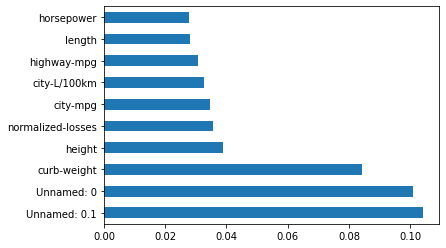

In [ ]:
final_ExtraTree.nlargest(10).plot(kind='barh')

# Correlation

In [ ]:
corr_matrix = df.iloc[:,:-1].corr()

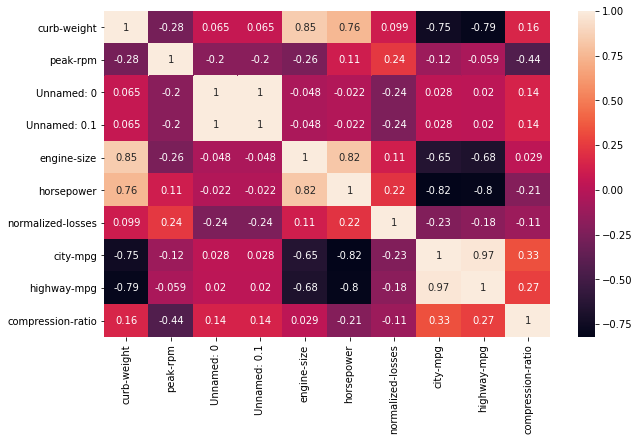

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df2.corr()
plt.figure(figsize=(10,6))
sns.heatmap(df2.corr(),annot=True)

In [ ]:
threshold = 0.8

dependent = set()

for i in range(len(df2.columns)):
  for j in range(i):
    if abs(corr_matrix.iloc[i,j])>threshold:
      dependent.add(corr_matrix.columns[i])

In [ ]:
dependent

{'Unnamed: 0.1', 'city-mpg', 'engine-size', 'highway-mpg', 'horsepower'}

In [ ]:
df3 = pd.concat([df2.drop(['Unnamed: 0.1', 'highway-mpg', 'horsepower'],axis=1),df['price']],axis=1)


In [ ]:
df3[:5]

,curb-weight,peak-rpm,Unnamed: 0,engine-size,normalized-losses,city-mpg,compression-ratio,price
0,2548,5000.0,0,130,122,21,9.0,13495.0
1,2548,5000.0,1,130,122,21,9.0,16500.0
2,2823,5000.0,2,152,122,19,9.0,16500.0
3,2337,5500.0,3,109,164,24,10.0,13950.0
4,2824,5500.0,4,136,164,18,8.0,17450.0


# Information Gain

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [380]:
classif = mutual_info_classif(X,y)

In [382]:
final_classif = pd.Series(classif,index=X.columns)

In [386]:
final_classif.sort_values(ascending=False).head(10)

gas                      2.476144
num-of-cylinders_four    2.442216
drive-wheels_fwd         2.154830
engine-type_ohc          1.916378
aspiration_std           1.792965
horsepower               1.742656
curb-weight              1.722550
highway-mpg              1.686382
engine-location_front    1.641103
city-L/100km             1.640586
dtype: float64

# Dropping Constant Features

In [395]:
data = pd.DataFrame({'A':[0,1,2,5,3,5,5,8,9,6],
              'B':np.random.randint(0,10,10),
              'C':np.zeros(10),
              'D':np.ones(10)
})

data

,A,B,C,D
0,0,7,0.0,1.0
1,1,5,0.0,1.0
2,2,2,0.0,1.0
3,5,3,0.0,1.0
4,3,3,0.0,1.0
5,5,7,0.0,1.0
6,5,1,0.0,1.0
7,8,3,0.0,1.0
8,9,4,0.0,1.0
9,6,4,0.0,1.0


In [396]:
from sklearn.feature_selection import VarianceThreshold

In [423]:
th = VarianceThreshold(threshold=0)

In [424]:
th.fit(data)

VarianceThreshold(threshold=0)

In [425]:
val = list(zip(list(th.get_support()),data.columns))

In [426]:
constant_columns = [j for  i,j in val if i==False]

In [427]:
constant_columns

['C', 'D']

In [428]:
data.drop(constant_columns,axis=1)

,A,B
0,0,7
1,1,5
2,2,2
3,5,3
4,3,3
5,5,7
6,5,1
7,8,3
8,9,4
9,6,4
